# Step 0: Import Libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Processed Dataset

In [15]:
df = pd.read_csv("../data/exoplanets_processed.csv")

print("✅ Processed dataset loaded!")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

✅ Processed dataset loaded!
Shape: (4855, 16)

Columns: ['name', 'mass_mj', 'radius_rj', 'period_days', 'semi_major_axis_au', 'temp_k', 'discovery_method', 'disc_year', 'distance_ly', 'star_mass_solar', 'star_temp_k', 'remarks', 'mass_earth', 'radius_earth', 'habitability_score', 'habitability_label']


,name,mass_mj,radius_rj,period_days,semi_major_axis_au,temp_k,discovery_method,disc_year,distance_ly,star_mass_solar,star_temp_k,remarks,mass_earth,radius_earth,habitability_score,habitability_label
0,16 Cygni Bb,2.38,NaN,799.500000,1.660000,1093.7,radial vel.,1996.0,68.99,1.040,5750.0,NaN,756.36400,2.32047,40.71812,0
1,23 Librae b,1.61,NaN,258.180000,0.810000,1093.7,radial vel.,1999.0,85.46,1.070,5736.0,NaN,511.65800,2.32047,49.51812,0
2,47 Ursae Majoris b,2.53,NaN,1078.000000,2.100000,1093.7,radial vel.,1996.0,45.02,1.080,5892.0,Proper name Taphao Thong,804.03400,2.32047,33.11812,0
3,51 Pegasi b,0.46,NaN,4.230785,0.052700,1093.7,radial vel.,1995.0,50.45,1.120,5793.0,Proper name Dimidium; previously informally na...,146.18800,2.32047,33.37212,0
4,55 Cancri b,0.8306,NaN,14.651520,0.115227,700.0,radial vel.,1996.0,41.06,0.905,5196.0,Proper name Galileo,263.96468,2.32047,35.12266,0


# Step 2: Feature Selection & Target

In [16]:
features = [
    "mass_earth", 
    "radius_earth", 
    "period_days", 
    "semi_major_axis_au", 
    "temp_k", 
    "distance_ly", 
    "star_mass_solar", 
    "star_temp_k"
]

In [17]:
target = "habitability_score"   # ✅ continuous % score

In [18]:
X = df[features]
y = df[target]

In [19]:
print("Features:", features)
print("Target:", target)

Features: ['mass_earth', 'radius_earth', 'period_days', 'semi_major_axis_au', 'temp_k', 'distance_ly', 'star_mass_solar', 'star_temp_k']
Target: habitability_score


# Step 3: Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (3884, 8)
Testing set size: (971, 8)


# Step 4: Train Regression Model

In [22]:
model = RandomForestRegressor(
    n_estimators=300, 
    max_depth=15, 
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
print("✅ Model training complete!")

✅ Model training complete!


# Step 5: Evaluate Model

In [24]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [25]:
print("✅ Model Evaluation:")
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 3))


✅ Model Evaluation:
RMSE: 1.2
R² Score: 0.978


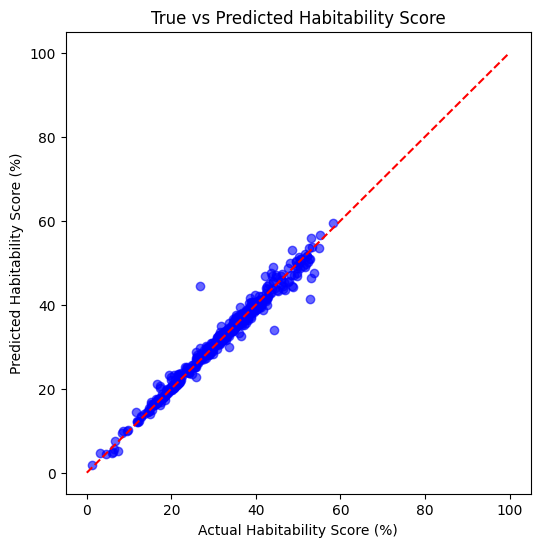

In [26]:
# Scatter Plot (True vs Predicted)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, c="blue")
plt.plot([0,100],[0,100], "r--")  # ideal line
plt.xlabel("Actual Habitability Score (%)")
plt.ylabel("Predicted Habitability Score (%)")
plt.title("True vs Predicted Habitability Score")
plt.show()

C:\Users\kc\AppData\Local\Temp\ipykernel_8668\3526736200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.feature_importances_, y=features, palette="viridis")


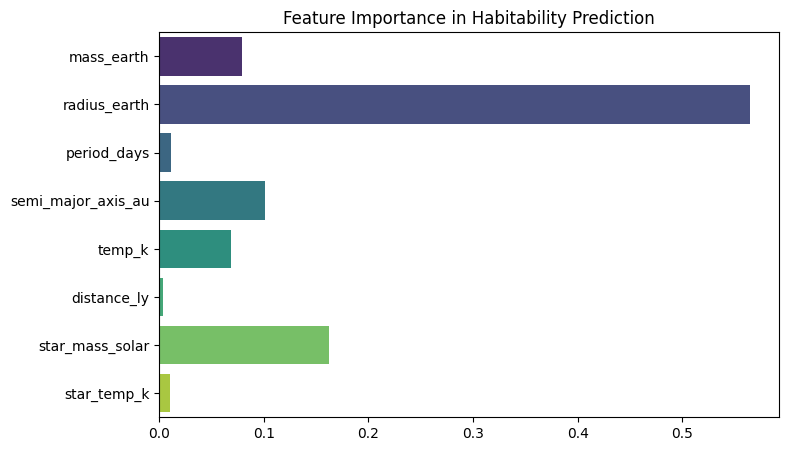

In [27]:
# Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_, y=features, palette="viridis")
plt.title("Feature Importance in Habitability Prediction")
plt.show()

# Step 6: Save Trained Model

In [28]:
joblib.dump(model, "../models/habitability_model.pkl")

['../models/habitability_model.pkl']

In [29]:
print("✅ Model saved at ../models/habitability_model.pkl")

✅ Model saved at ../models/habitability_model.pkl


# Step 7: Quick Demo Prediction

In [30]:
sample = X_test.iloc[0:1]
pred_score = model.predict(sample)[0]

In [31]:
print("Demo Planet Features:\n", sample)
print("Predicted Habitability Score:", round(pred_score, 2), "%")

Demo Planet Features:
       mass_earth  radius_earth  period_days  semi_major_axis_au  temp_k  \
4240     282.842       2.32047    11.829851               0.117  1093.7   

      distance_ly  star_mass_solar  star_temp_k  
4240       1361.5             0.97       5600.0  
Predicted Habitability Score: 36.44 %
